In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("C:\\Users\\Jahna\\Desktop\\ML1\\voice.csv")

In [55]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [56]:
df.shape

(3168, 21)

In [57]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [66]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [58]:
label1 = df.label.value_counts().index
count = df.label.value_counts().values

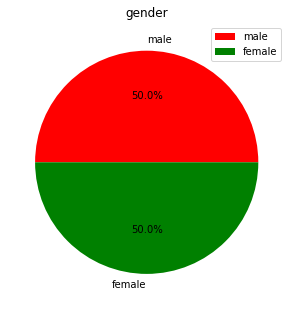

In [65]:
#Depict percentage distribution of label on a pie chart
color=['r','g']
explode = (0,0.1)
plt.figure(1,figsize=(5,10))
plt.pie(count,labels=label1,colors=color,autopct='%1.1f%%')
plt.title("gender")
plt.legend()
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lb=LabelEncoder()

In [24]:
df['label']=lb.fit_transform(df['label'])

In [25]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

In [26]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [44]:
r1 = df['label'].value_counts()
r1

1    1584
0    1584
Name: label, dtype: int64

In [27]:
x = df.iloc[:]
y = df['label']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3168, 21)
(3168,)


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2376, 21)
(792, 21)
(2376,)
(792,)


In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
def mscore():
    print('Model Training Score',model.score(x_train,y_train))
    print('Model Testing Score',model.score(x_test,y_test))
def gen_metrics(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))   

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [33]:
m1=LogisticRegression(max_iter=1000)
m2=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=20)
m3=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=6,min_samples_split=15)
m4=KNeighborsClassifier(n_neighbors=15)
m5=SVC(kernel='linear',C=1)
models=[m1,m2,m3,m4,m5]
mnames=['LogReg','DTC','RFC','KNC','SVC']

In [34]:
def mscore(model):
    print('Model Training Score',model.score(x_train,y_train))
    print('Model Testing Score',model.score(x_test,y_test))
def gen_metrics(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))   

In [37]:
###dictionary
d={}
for i in range(len(models)):
    print(mnames[i])
    models[i].fit(x_train,y_train)
    mscore(models[i])
    ypred = models[i].predict(x_test)
    d[mnames[i]] = accuracy_score(y_test,ypred)
    print(ypred)
    gen_metrics(y_test,ypred)
    print('*'*70)

LogReg
Model Training Score 1.0
Model Testing Score 1.0
[0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0
 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1